# House Price EDA and Prediction

In [1]:
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

        
import math
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import sklearn.model_selection as ms
import sklearn.metrics as sklm
import seaborn as sns
import matplotlib.patches as mpatches
import matplotlib.gridspec as gridspec 


from scipy import stats
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import cross_val_score, GridSearchCV, KFold, RandomizedSearchCV, train_test_split

/kaggle/input/house-prices-advanced-regression-techniques/sample_submission.csv
/kaggle/input/house-prices-advanced-regression-techniques/data_description.txt
/kaggle/input/house-prices-advanced-regression-techniques/train.csv
/kaggle/input/house-prices-advanced-regression-techniques/test.csv


In [2]:
description = open("/kaggle/input/house-prices-advanced-regression-techniques/data_description.txt", "r")
print(description.read())

MSSubClass: Identifies the type of dwelling involved in the sale.	

        20	1-STORY 1946 & NEWER ALL STYLES
        30	1-STORY 1945 & OLDER
        40	1-STORY W/FINISHED ATTIC ALL AGES
        45	1-1/2 STORY - UNFINISHED ALL AGES
        50	1-1/2 STORY FINISHED ALL AGES
        60	2-STORY 1946 & NEWER
        70	2-STORY 1945 & OLDER
        75	2-1/2 STORY ALL AGES
        80	SPLIT OR MULTI-LEVEL
        85	SPLIT FOYER
        90	DUPLEX - ALL STYLES AND AGES
       120	1-STORY PUD (Planned Unit Development) - 1946 & NEWER
       150	1-1/2 STORY PUD - ALL AGES
       160	2-STORY PUD - 1946 & NEWER
       180	PUD - MULTILEVEL - INCL SPLIT LEV/FOYER
       190	2 FAMILY CONVERSION - ALL STYLES AND AGES

MSZoning: Identifies the general zoning classification of the sale.
		
       A	Agriculture
       C	Commercial
       FV	Floating Village Residential
       I	Industrial
       RH	Residential High Density
       RL	Residential Low Density
       RP	Residential Low Density Park 
       RM

In [87]:
train = pd.read_csv('/kaggle/input/house-prices-advanced-regression-techniques/train.csv')
test = pd.read_csv('/kaggle/input/house-prices-advanced-regression-techniques/test.csv')

In [88]:
test_id = test['Id']

In [89]:
df = train

In [90]:
df.head(5)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [91]:
print(df.keys())

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [92]:
df.drop(['Id','MSZoning'], axis = 1, inplace = True)
test.drop(['Id','MSZoning'], axis = 1, inplace = True)

In [93]:
train = df

In [94]:
print(f"Number of rows and number of columns in the train dataset are {train.shape[0]} and {train.shape[1]}")
print(f"Number of rows and number of columns in the test dataset are {test.shape[0]} and {test.shape[1]}")

Number of rows and number of columns in the train dataset are 1460 and 79
Number of rows and number of columns in the test dataset are 1459 and 78


# Feature Analysis

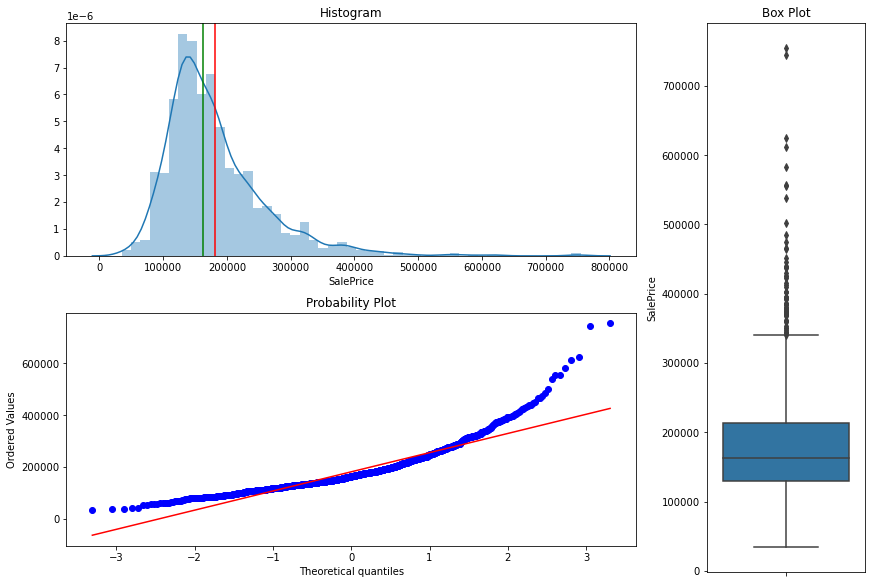

In [95]:
def three_chart_plot(df, feature):
    fig = plt.figure(constrained_layout = True, figsize = (12, 8))
    grid = gridspec.GridSpec(ncols = 3, nrows = 3, figure = fig)
    
    ax1 = fig.add_subplot(grid[0, :2])
    ax1.set_title('Histogram')
    
    sns.distplot(df.loc[:, feature], norm_hist = True, ax = ax1)
    plt.axvline(x = df[feature].mean(), c = 'red')
    plt.axvline(x = df[feature].median(), c = 'green')
    
    ax2 = fig.add_subplot(grid[1, :2])
    ax2.set_title('QQ_plot')
    stats.probplot(df.loc[:,feature], plot = ax2)

    ## Customizing the Box Plot. 
    ax3 = fig.add_subplot(grid[:, 2])
    ## Set title. 
    ax3.set_title('Box Plot')
    sns.boxplot(df.loc[:,feature], orient = 'v', ax = ax3 )
    
three_chart_plot(df, 'SalePrice')

From the above plots, we can observe that the Sales Price is not normally distributed. From the boxplot we can observe that the dataset have a number of outliers.

For the probability plot, the red line represents those points which would have been plotted for y-axis points **if those were normally distributed**. But the blue points represents the actual scenario. We can see that there is a lot of deviation on the both the ends i.e on the top right and bottom left.

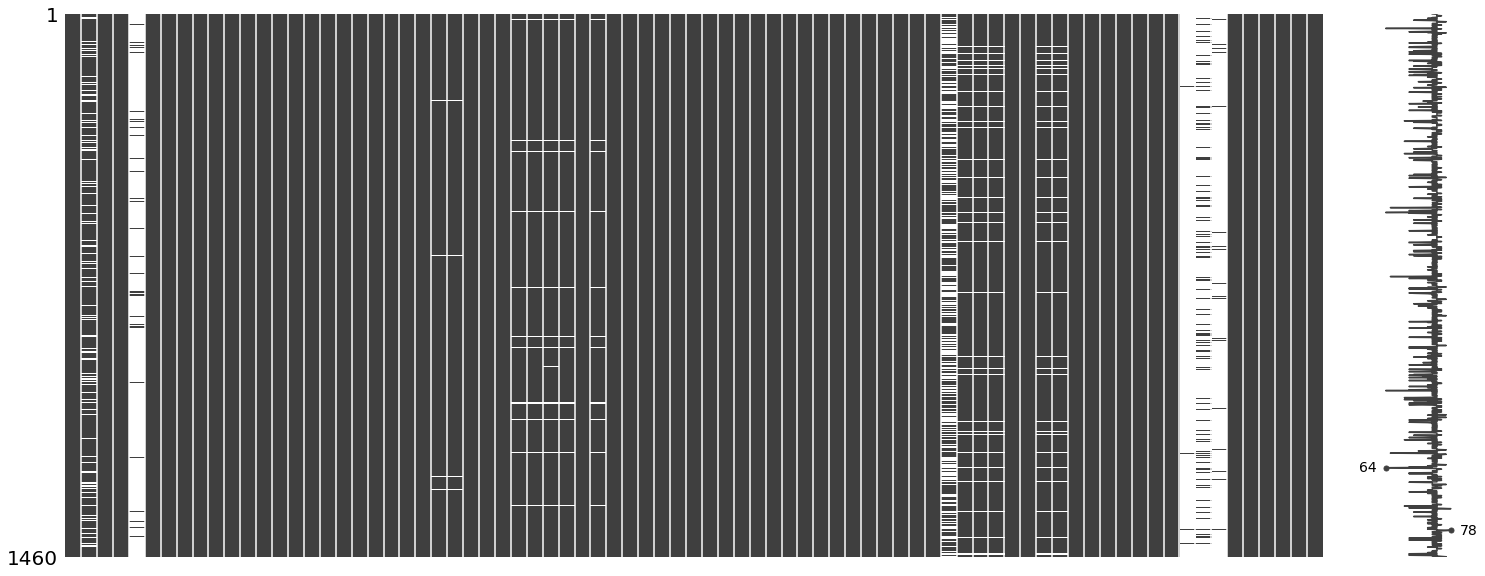

In [96]:

##NULL Values
import missingno as msno
%matplotlib inline
msno.matrix(train)

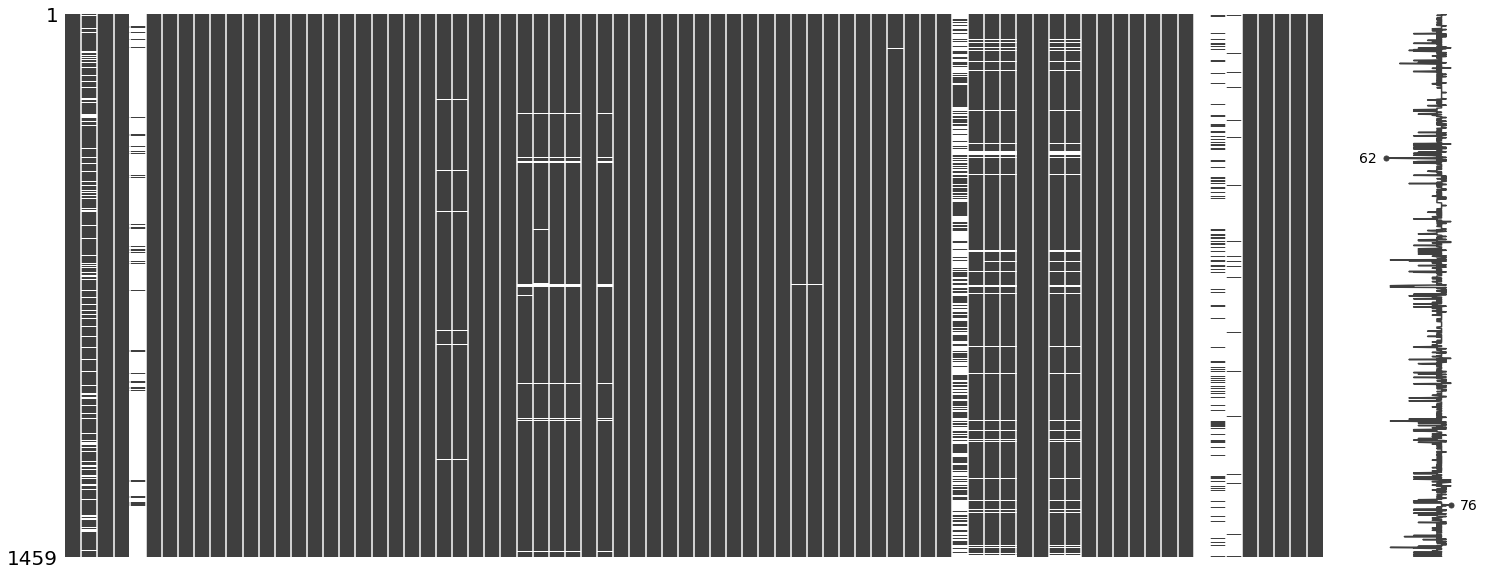

In [97]:
msno.matrix(test)

In [98]:
def null_table(data):
    """
    A function which returns the number and percentage of null values in the given dataset.
    """
    indices = data.isnull().sum().index
    values = data.isnull().sum().values
    percentages = []
    for i in indices:
        percentages.append((data[i].isnull().sum() / data[i].shape[0]) * 100)
    d = {'Columns' : indices, 'Count of Null Values' : values, 'Approximate Percentage of Null Values' : percentages}
    # data = dict(zip(indices, percentages))
    null_frame = pd.DataFrame(data = d)
    return null_frame

In [99]:
null_frame_train = null_table(df)
null_frame_train.sort_values(by = 'Approximate Percentage of Null Values').tail(10)

,Columns,Count of Null Values,Approximate Percentage of Null Values
62,GarageCond,81,5.547945
61,GarageQual,81,5.547945
57,GarageYrBlt,81,5.547945
56,GarageType,81,5.547945
1,LotFrontage,259,17.739726
55,FireplaceQu,690,47.260274
71,Fence,1179,80.753425
4,Alley,1369,93.767123
72,MiscFeature,1406,96.301370
70,PoolQC,1453,99.520548


In [100]:
null_frame_test = null_table(test)
null_frame_test.sort_values(by = 'Approximate Percentage of Null Values').tail(10)

,Columns,Count of Null Values,Approximate Percentage of Null Values
62,GarageCond,78,5.346127
58,GarageFinish,78,5.346127
57,GarageYrBlt,78,5.346127
61,GarageQual,78,5.346127
1,LotFrontage,227,15.558602
55,FireplaceQu,730,50.034270
71,Fence,1169,80.123372
4,Alley,1352,92.666210
72,MiscFeature,1408,96.504455
70,PoolQC,1456,99.794380


In [101]:
na = train.shape[0]
nb = test.shape[0]
y_train = train['SalePrice'].to_frame()
# Combine train and test sets
total = pd.concat((train, test), sort = False).reset_index(drop = True)
# Drop the target "SalePrice" and Id columns
total.drop(['SalePrice','MSZoning'], axis = 1, inplace = True)
print(f"Total size is {total.shape}")

KeyError: "['MSZoning'] not found in axis"

In [ ]:
def msv_1(data, thresh = 20, color = 'black', edgecolor = 'black', height = 3, width = 15):
    
    plt.figure(figsize = (width, height))
    percentage = (data.isnull().mean()) * 100
    percentage.sort_values(ascending = False).plot.bar(color = color, edgecolor = edgecolor)
    plt.axhline(y = thresh, color = 'r', linestyle = '-')
    
    plt.title('Missing values percentage per column', fontsize=20, weight='bold' )
    
    plt.text(len(data.isnull().sum()/len(data))/1.7, thresh+12.5, f'Columns with more than {thresh}% missing values', fontsize=12, color='crimson',
         ha='left' ,va='top')
    plt.text(len(data.isnull().sum()/len(data))/1.7, thresh - 5, f'Columns with less than {thresh}% missing values', fontsize=12, color='green',
         ha='left' ,va='top')
    plt.xlabel('Columns', size=15, weight='bold')
    plt.ylabel('Missing values percentage')
    plt.yticks(weight ='bold')
    
    return plt.show()

In [ ]:
msv_1(total, 20, color=sns.color_palette('Reds',15))

There are 5 columns having more than 20 percent null values. We will deal with these values later.

In [102]:
correlation = df.corr()['SalePrice'].sort_values(ascending = False).to_frame().head(10)
cmap = sns.light_palette("cyan", as_cmap = True)
s = correlation.style.background_gradient(cmap = cmap)
s

,SalePrice
SalePrice,1.000000
OverallQual,0.790982
GrLivArea,0.708624
GarageCars,0.640409
GarageArea,0.623431
TotalBsmtSF,0.613581
1stFlrSF,0.605852
FullBath,0.560664
TotRmsAbvGrd,0.533723
YearBuilt,0.522897


### Numerical Variables

In [103]:
train = train[train['GrLivArea'] < 4500]
previous_train = df
df = train

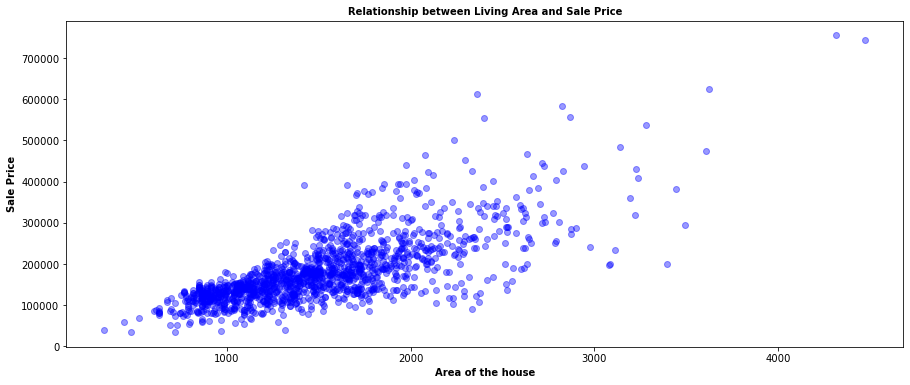

In [104]:
plt.figure(figsize = ((15, 6)))
plt.scatter(x = 'GrLivArea', y = 'SalePrice', data = df, color='blue', alpha=0.4)
plt.title('Relationship between Living Area and Sale Price', weight = 'bold', fontsize = 10)
plt.xlabel('Area of the house', weight = 'bold')
plt.ylabel('Sale Price', weight = 'bold')
plt.show()

#### Garage Area

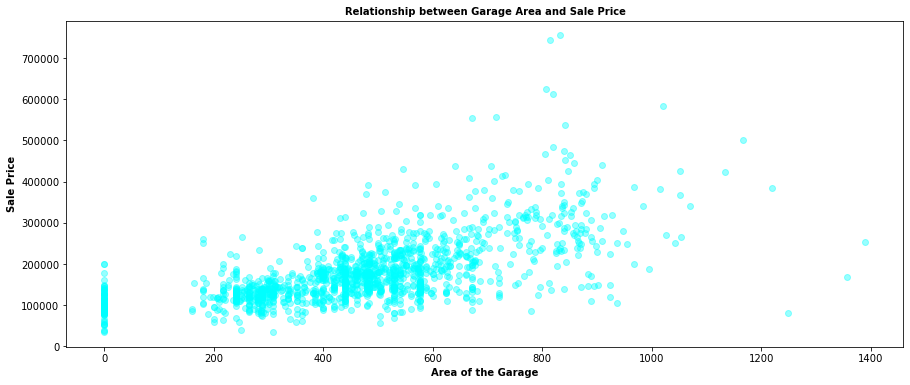

In [105]:
plt.figure(figsize = ((15, 6)))
plt.scatter(x = 'GarageArea', y = 'SalePrice', data = df, color='cyan', alpha=0.4)
plt.title('Relationship between Garage Area and Sale Price', weight = 'bold', fontsize = 10)
plt.xlabel('Area of the Garage', weight = 'bold')
plt.ylabel('Sale Price', weight = 'bold')
plt.show()

#### Total Basement Area

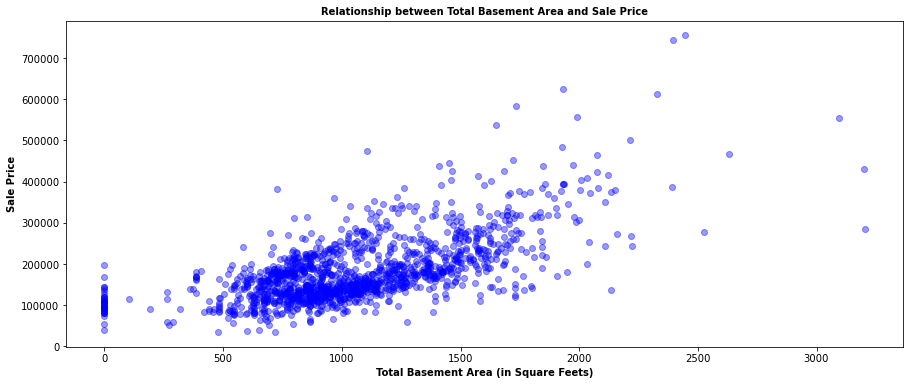

In [106]:
plt.figure(figsize = ((15, 6)))
plt.scatter(x = 'TotalBsmtSF', y = 'SalePrice', data = df, color = 'blue', alpha = 0.4)
plt.title('Relationship between Total Basement Area and Sale Price', weight = 'bold', fontsize = 10)
plt.xlabel('Total Basement Area (in Square Feets)', weight = 'bold')
plt.ylabel('Sale Price', weight = 'bold')
plt.show()

#### 1st Floor Area

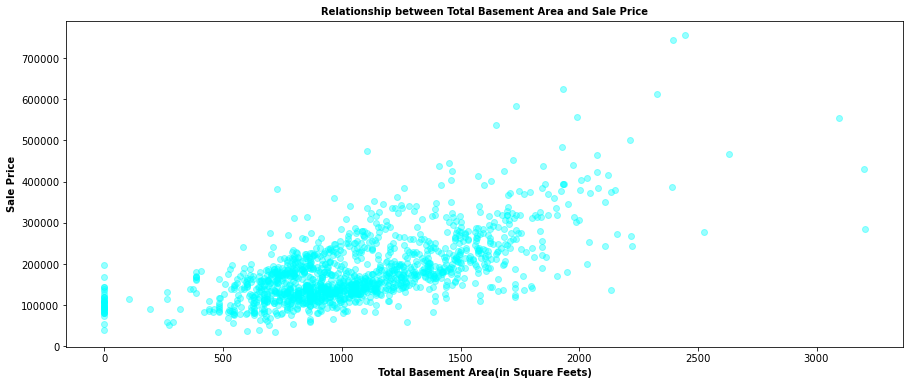

In [107]:
plt.figure(figsize = ((15, 6)))
plt.scatter(x = 'TotalBsmtSF', y = 'SalePrice', data = df, color = 'cyan', alpha = 0.4)
plt.title('Relationship between Total Basement Area and Sale Price', weight = 'bold', fontsize = 10)
plt.xlabel('Total Basement Area(in Square Feets)', weight = 'bold')
plt.ylabel('Sale Price', weight = 'bold')
plt.show()

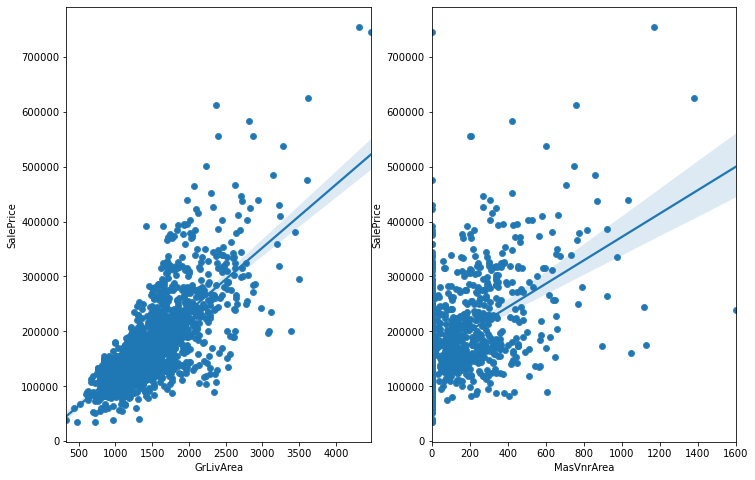

In [108]:
## Scatter plotting for SalePrice and GrLivArea.
fig, (ax1, ax2) = plt.subplots(figsize = (12, 8), ncols = 2,sharey = False)
 
sns.scatterplot(x = df['GrLivArea'], y = df['SalePrice'],  ax = ax1)
## Putting a regression line. 
sns.regplot(x = df['GrLivArea'], y = df['SalePrice'], ax = ax1)

sns.scatterplot(x = df['MasVnrArea'],y = df['SalePrice'], ax = ax2)
## regression line for MasVnrArea and SalePrice. 
sns.regplot(x = df['MasVnrArea'], y = df['SalePrice'], ax=ax2)

### Categorical Variables

In [109]:
def horizontal_plot(data, column_name, color, plot_title):
    
    """
    A function that plots a horizontal bar graph for the given column name
    """
    
    fig, ax = plt.subplots(figsize = (9, 6))
    
    title_cnt = data[column_name].value_counts().sort_values(ascending = False).reset_index()

    mn = ax.barh(title_cnt.iloc[:, 0], title_cnt.iloc[:, 1], edgecolor = 'black', color =
                sns.color_palette(color, len(title_cnt)))

    for s in ['top','bottom','left','right']:
        ax.spines[s].set_visible(False)

    # Remove x,y Ticks
    ax.xaxis.set_ticks_position('none')
    ax.yaxis.set_ticks_position('none')

    # Add padding between axes and labels
    ax.xaxis.set_tick_params(pad=5)
    ax.yaxis.set_tick_params(pad=10)

    # Add x,y gridlines
    ax.grid(b=True, color='grey', linestyle='-.', linewidth=1, alpha=0.2)

    # Show top values 
    ax.invert_yaxis()

    ax.set_title(plot_title,weight='bold',loc='center', pad=10, fontsize=16)
    
    ax.set_xlabel('Count', weight='bold')

    for i in ax.patches:
        ax.text(i.get_width() + 1.0, i.get_y() + 0.5, str(round((i.get_width()), 2)),
                fontsize=10, fontweight='bold', color='grey')

    plt.yticks(weight='bold')
    plt.xticks(weight='bold')

    plt.show()

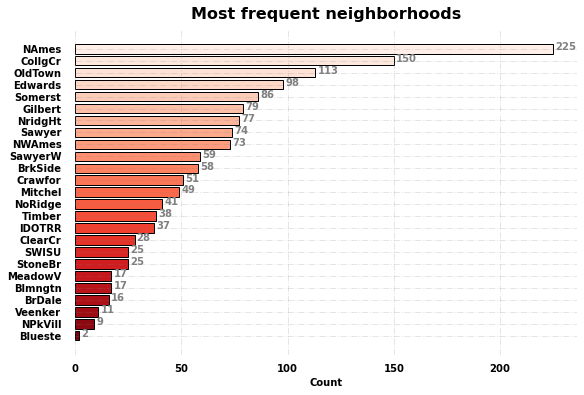

In [110]:
horizontal_plot(df, 'Neighborhood', 'Reds', 'Most frequent neighborhoods')

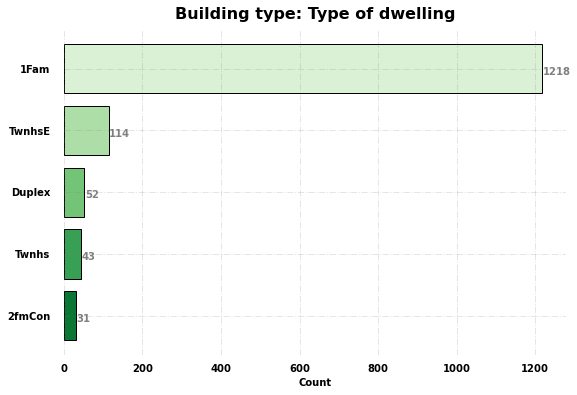

In [111]:
horizontal_plot(df, 'BldgType', 'Greens', 'Building type: Type of dwelling')

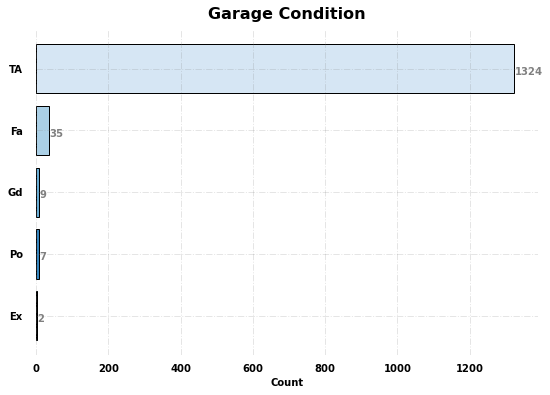

In [112]:
horizontal_plot(df, 'GarageCond', 'Blues', 'Garage Condition')

Most of the houses have Typically Average Garage Condition. Only couple of houses have Excellent Garage Condition.

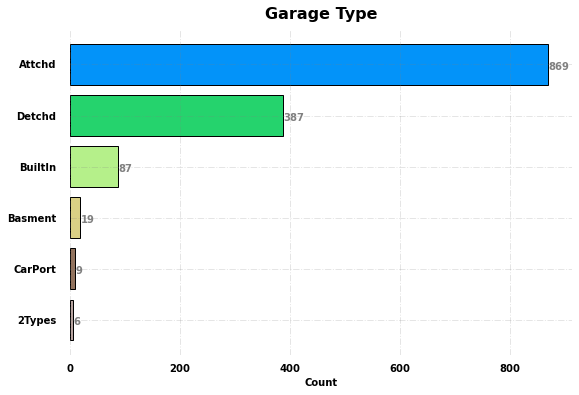

In [113]:
horizontal_plot(df, 'GarageType', 'terrain', 'Garage Type')

Most of the houses have Attached Garages and only 19 have Garages in the Basement.

In [114]:
def fix_skew(features):
    
    from scipy.special import boxcox1p
    from scipy.stats import boxcox_normmax
    
    ## Getting all the data that are not of "object" type. 
    numerical_columns = features.select_dtypes(exclude = 'object').columns

    # Check the skew of all numerical features
    skewed_features = features[numerical_columns].apply(lambda x: x.skew()).sort_values(ascending=False)
    
    high_skew = skewed_features[abs(skewed_features) > 0.5]
    skewed_features = high_skew.index

    # Perform the Box-Cox transformation
    for column in skewed_features:
        features[column] = boxcox1p(features[column], boxcox_normmax(features[column] + 1))
        
    return features

In [115]:
def filling_null(features):
    
    # In the description for 'Functional Feature', it is given that Typ refers to the Typical Functionality
    # We will replace null values in the 'Functional' feature with 'Typ'
    
    features['Functional'] = features['Functional'].fillna('Typ')
    
    # Replace the null values in the below columns with their mode. We are replacing with mode because
    # all of these features are categorical variable, we can't take the mean nor the median.
    
    features['Electrical'] = features['Electrical'].fillna(features['Electrical'].mode()[0])
    
    features['KitchenQual'] = features['KitchenQual'].fillna(features['KitchenQual'].mode()[0])
    
    features['Exterior1st'] = features['Exterior1st'].fillna(features['Exterior1st'].mode()[0])
    
    features['Exterior2nd'] = features['Exterior2nd'].fillna(features['Exterior2nd'].mode()[0])

    features['SaleType'] = features['SaleType'].fillna(features['SaleType'].mode()[0])
    
    # In order to fill the null values for MSZoing, we will take into account the MSSubClass featue.
    # We are doing so because the type of dwelling in a given area largely affects the zone of the area.
    
    # In order to fill the null values for LotFrontage(Linear feet of street connected to property) 
    # we will fill it with median of the values grouped by Neighborhood.
    
    features['LotFrontage'] = features.groupby('Neighborhood')['LotFrontage'].transform(lambda x: x.fillna(x.median()))
    
    # As mentioned before that the 'NA' value in many columns represent the absence of that feature for
    # a particular house, we will replace those null values with None.
    # 'None' for categorical feature and 0 for numerical feature.
    
    cat_features = features.select_dtypes(include = 'object').columns
    num_features = features.select_dtypes(exclude = 'object').columns
    
    features[cat_features] = features[cat_features].fillna('None')
    features[num_features] = features[num_features].fillna(0)
        
    return features

In [116]:
y = df['SalePrice'].reset_index(drop = True)
train_features = df.drop('SalePrice', axis = 1)
test_features = test.copy()

features = pd.concat((train_features, test_features)).reset_index(drop = True)

features['MSSubClass'] = features['MSSubClass'].apply(str)
features['MoSold'] = features['MoSold'].astype(str)
features['YrSold'] = features['YrSold'].astype(str)
features = filling_null(features)
features.shape

(2917, 78)

In [117]:
features = pd.get_dummies(features).reset_index(drop=True)
features.shape

(2917, 327)

In [118]:
features.isnull().sum().sum()

0

In [119]:
X = features.iloc[:len(y), :]
test = features.iloc[len(y):, :]

In [120]:
X.shape, test.shape, y.shape

((1458, 327), (1459, 327), (1458,))

# Training and Testing Machine Learning Models

In [121]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)
X_train = np.array(X_train)
y_train = np.array(y_train)
X_test = np.array(X_test)
y_test = np.array(y_test)
y_train = y_train.reshape((-1, 1))
y_test = y_test.reshape((-1, 1))

In [158]:
from sklearn.preprocessing import MinMaxScaler

X_scaler = MinMaxScaler()
y_scaler = MinMaxScaler()

X_train = X_scaler.fit_transform(X_train)
y_train = y_scaler.fit_transform(y_train.reshape(-1, 1))  # Reshape y_train to a 2D array for fitting

# Transform the test data using the trained scalers
X_test = X_scaler.transform(X_test)

In [159]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((1093, 327), (365, 327), (1093, 1), (365, 1))

In [160]:
from sklearn.metrics import mean_squared_error, mean_absolute_error

In [161]:
def evaluation(model, x_train_std, y_train, x_test, y_test, train = True):
    if train == True:
        pred = model.predict(x_train_std)
        pred = y_scaler.inverse_transform(pred)
        
        print("Train Result:\n================================================")
        print(f"Root Mean Squared Error: {np.sqrt(mean_squared_error(y_train, pred))}")
        print("_______________________________________________")
        print(f"Mean Squared Error: {mean_squared_error(y_train, pred)}")
        print("_______________________________________________")
        print(f"Mean Absolute Error: \n{mean_absolute_error(y_train, pred)}")
        print("_______________________________________________")
        
    print()
    
    if train == False:
        pred = model.predict(x_test)
        pred = y_scaler.inverse_transform(pred)
        
        print("Test Result:\n================================================")
        print(f"Root Mean Squared Error: {np.sqrt(mean_squared_error(y_test, pred))}")
        print("_______________________________________________")
        print(f"Mean Squared Error: {mean_squared_error(y_test, pred)}")
        print("_______________________________________________")
        print(f"Mean Absolute Error: \n{mean_absolute_error(y_test, pred)}")
        print("_______________________________________________")

### Neural networks

In [162]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout

class PrintEveryNthEpoch(tf.keras.callbacks.Callback):
    def __init__(self, n=100):
        self.n = n

    def on_epoch_end(self, epoch, logs=None):
        if epoch % self.n == 0:
            print(f"Epoch {epoch}, loss: {logs['loss']}, val_loss: {logs['val_loss']}")

            
def create_model(input_shape):
    model = Sequential()

    model.add(Dense(1024, input_shape=input_shape, activation='relu'))
    model.add(Dropout(0.2))
    model.add(Dense(512, activation='relu'))
    model.add(Dropout(0.2))
    model.add(Dense(256, activation='relu'))
    model.add(Dropout(0.2))
    model.add(Dense(128, activation='relu'))
    model.add(Dropout(0.2))
    model.add(Dense(64, activation='relu'))
    model.add(Dropout(0.2))
    model.add(Dense(32, activation='relu'))
    model.add(Dropout(0.2))

    model.add(Dense(1, activation='linear'))

    # Compile the model
    model.compile(optimizer='adam', loss='mean_squared_error')

    return model

In [163]:
model = create_model(input_shape=X_train.shape)
model.fit(X_train, y_train, epochs=1500, batch_size=32, validation_split=0.2, verbose=0,callbacks=[PrintEveryNthEpoch(100)])

Epoch 0, loss: 0.02067025937139988, val_loss: 0.01621536910533905
Epoch 100, loss: 0.0011903843842446804, val_loss: 0.0022536495234817266
Epoch 200, loss: 0.0009089651866815984, val_loss: 0.002028545131906867
Epoch 300, loss: 0.0007773323450237513, val_loss: 0.0021172757260501385
Epoch 400, loss: 0.0005645792698487639, val_loss: 0.0020433459430933
Epoch 500, loss: 0.0005716052837669849, val_loss: 0.0026460334192961454
Epoch 600, loss: 0.0005570827051997185, val_loss: 0.0021108880173414946
Epoch 700, loss: 0.0005750080454163253, val_loss: 0.0025305028539150953
Epoch 800, loss: 0.0005190131487324834, val_loss: 0.0022192448377609253
Epoch 900, loss: 0.00044645456364378333, val_loss: 0.0020545655861496925
Epoch 1000, loss: 0.0005322506185621023, val_loss: 0.002349680056795478
Epoch 1100, loss: 0.0006332765333354473, val_loss: 0.0023310857359319925
Epoch 1200, loss: 0.0005133375525474548, val_loss: 0.0023061828687787056
Epoch 1300, loss: 0.0005799244972877204, val_loss: 0.00250188447535038


In [164]:
evaluation(model, X_train, y_train, X_test, y_test, True)
evaluation(model, X_train, y_train, X_test, y_test, False)

Train Result:
Root Mean Squared Error: 209709.16913026976
_______________________________________________
Mean Squared Error: 43977935617.30809
_______________________________________________
Mean Absolute Error: 
197875.561453718
_______________________________________________


Test Result:
Root Mean Squared Error: 39773.535162838416
_______________________________________________
Mean Squared Error: 1581934099.3495438
_______________________________________________
Mean Absolute Error: 
28981.07288099315
_______________________________________________


### Lasso Regression

In [58]:
from sklearn.linear_model import Lasso
ls = Lasso(alpha = 0.1)
ls.fit(X_train, y_train)

evaluation(ls, X_train, y_train, X_test, y_test, True)
evaluation(ls, X_train, y_train, X_test, y_test, False)

Train Result:
Root Mean Squared Error: 17950.085171662213
_______________________________________________
Mean Squared Error: 322205557.66992766
_______________________________________________
Mean Absolute Error: 
12121.655937535701
_______________________________________________


Test Result:
Root Mean Squared Error: 29870.21261848198
_______________________________________________
Mean Squared Error: 892229601.8733201
_______________________________________________
Mean Absolute Error: 
18822.269661112718
_______________________________________________


/opt/conda/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 176677905311.1571, tolerance: 656263743.5594918
  positive)


### Ridge Regression

In [59]:
from sklearn.linear_model import Ridge
ridge = Ridge(alpha = 0.1)
ridge.fit(X_train, y_train)

evaluation(ridge, X_train, y_train, X_test, y_test, True)
evaluation(ridge, X_train, y_train, X_test, y_test, False)

Train Result:
Root Mean Squared Error: 18173.10162400554
_______________________________________________
Mean Squared Error: 330261622.63643277
_______________________________________________
Mean Absolute Error: 
12322.138601340766
_______________________________________________


Test Result:
Root Mean Squared Error: 25613.217630787505
_______________________________________________
Mean Squared Error: 656036917.402084
_______________________________________________
Mean Absolute Error: 
17786.249078350786
_______________________________________________


### XGB Regressor

In [60]:
import xgboost as xgb
xgb_regress = xgb.XGBRegressor(n_estimators = 1000, learning_rate = 0.1)
xgb_regress.fit(X_train, y_train)

evaluation(xgb_regress, X_train, y_train, X_test, y_test, True)
evaluation(xgb_regress, X_train, y_train, X_test, y_test, False)

Train Result:
Root Mean Squared Error: 26.13813834109908
_______________________________________________
Mean Squared Error: 683.2022759384337
_______________________________________________
Mean Absolute Error: 
15.84692717863678
_______________________________________________


Test Result:
Root Mean Squared Error: 22113.466124211183
_______________________________________________
Mean Squared Error: 489005384.0266356
_______________________________________________
Mean Absolute Error: 
15238.325834760273
_______________________________________________


# Submission

In [165]:
test_pred = model.predict(test)
submission = pd.DataFrame(test_id, columns = ['Id'])
test_pred = np.expm1(test_pred)
submission['SalePrice'] = test_pred 
submission.head()

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:3: RuntimeWarning: overflow encountered in expm1
  This is separate from the ipykernel package so we can avoid doing imports until


,Id,SalePrice
0,1461,1.047806e+21
1,1462,5.947610e+30
2,1463,3.660311e+26
3,1464,4.045311e+19
4,1465,3.935376e+06


In [166]:
submission.to_csv("output.csv", index = False, header = True)